# 선형회귀 (자동차 연비 예측)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

# 데이터 준비

In [2]:
!gdown https://raw.githubusercontent.com/devdio/datasets/main/auto-mpg.csv

Downloading...
From: https://raw.githubusercontent.com/devdio/datasets/main/auto-mpg.csv
To: /content/auto-mpg.csv
18.1kB [00:00, 22.9MB/s]       


In [21]:
mpg = pd.read_csv('/content/auto-mpg.csv', na_values=['?'])
mpg.shape

(398, 9)

In [6]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [19]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [22]:
mpg.isna().sum(axis=0)

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [23]:
mpg.shape

(398, 9)

In [24]:
mpg = mpg.dropna()
mpg.shape

(392, 9)

In [25]:
mpg.isna().sum(axis=0)

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [26]:
mpg['horsepower'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
       100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,  65.,
        69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137., 158.,
       167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,  78.,
        52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,  81.,
        79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,  48.,
        66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62., 132.,
        84.,  64.,  74., 116.,  82.])

In [27]:
mpg['origin'].value_counts()

1    245
3     79
2     68
Name: origin, dtype: int64

In [28]:
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [29]:
X = mpg.drop(['mpg', 'origin', 'car name'], axis=1)
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model year
0,8,307.0,130.0,3504,12.0,70
1,8,350.0,165.0,3693,11.5,70
2,8,318.0,150.0,3436,11.0,70
3,8,304.0,150.0,3433,12.0,70
4,8,302.0,140.0,3449,10.5,70


In [30]:
y = mpg['mpg']
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [31]:
# 테스트 셋 나누기

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

print(X_train.shape, X_test.shape)

(313, 6) (79, 6)


In [73]:
# 정규화

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
y_train = y_train.values

# 모델

In [54]:
X_train, y_train

(     cylinders  displacement  horsepower  weight  acceleration  model year
 226          6         231.0       105.0    3425          16.9          77
 237          4          98.0        63.0    2051          17.0          77
 72           8         304.0       150.0    3892          12.5          72
 259          6         200.0        85.0    3070          16.7          78
 201          6         250.0       110.0    3645          16.2          76
 ..         ...           ...         ...     ...           ...         ...
 179          4         121.0        98.0    2945          14.5          75
 113          6         155.0       107.0    2472          14.0          73
 175          4          90.0        70.0    1937          14.0          75
 222          8         260.0       110.0    4060          19.0          77
 387          6         262.0        85.0    3015          17.0          82
 
 [313 rows x 6 columns], 226    20.5
 237    30.5
 72     15.0
 259    20.8
 201    18

In [55]:
X_train.shape

(313, 6)

In [56]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(6,)),     #shape 갯수가 맞아야 함
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                448       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mse', 'mae']

)

In [58]:
# 학습

EPOCHS = 200
BATCH_SIZE = 32

history = model.fit(X_train_s, y_train,
            epochs = EPOCHS,
            batch_size = BATCH_SIZE,
            validation_split = 0.2,
            verbose = 1)


Epoch 1/200
8/8 [==============================] - 1s 30ms/step - loss: 576.7900 - mse: 576.7900 - mae: 22.7009 - val_loss: 644.1298 - val_mse: 644.1298 - val_mae: 24.1212
Epoch 2/200
8/8 [==============================] - 0s 6ms/step - loss: 561.7087 - mse: 561.7087 - mae: 22.3568 - val_loss: 628.2762 - val_mse: 628.2762 - val_mae: 23.7943
Epoch 3/200
8/8 [==============================] - 0s 5ms/step - loss: 545.3729 - mse: 545.3729 - mae: 21.9746 - val_loss: 609.9458 - val_mse: 609.9458 - val_mae: 23.4152
Epoch 4/200
8/8 [==============================] - 0s 7ms/step - loss: 525.9813 - mse: 525.9813 - mae: 21.5292 - val_loss: 587.5624 - val_mse: 587.5624 - val_mae: 22.9466
Epoch 5/200
8/8 [==============================] - 0s 5ms/step - loss: 503.1599 - mse: 503.1599 - mae: 20.9847 - val_loss: 558.1089 - val_mse: 558.1089 - val_mae: 22.3258
Epoch 6/200
8/8 [==============================] - 0s 5ms/step - loss: 473.9699 - mse: 473.9699 - mae: 20.2900 - val_loss: 522.2402 - val_mse: 5

In [59]:
model.evaluate(X_train_s, y_train)

10/10 [==============================] - 0s 2ms/step - loss: 6.8369 - mse: 6.8369 - mae: 1.8393


[6.836927890777588, 6.836927890777588, 1.8392856121063232]

In [60]:
# 로그 확인
history.history.keys()

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])

In [61]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.plot(hist['epoch'], hist['mse'], label='Train MSE')
    plt.plot(hist['epoch'], hist['val_mse'], label='Val MSE')
    plt.legend()
    plt.show()

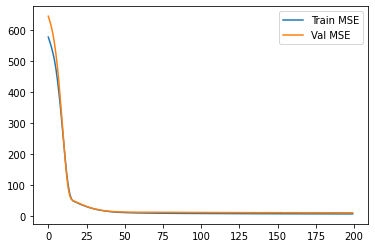

In [62]:
plot_history(history)

In [74]:
## 예측

X_test_s = scaler.transform(X_test)
y_test = y_test.values

In [69]:
y_pred = model.predict(X_test_s)
y_pred.shape

3/3 [==============================] - 0s 3ms/step


(79, 1)

In [70]:
y_test.shape

(79,)

In [71]:
y_pred = y_pred.reshape(-1)
y_pred.shape

(79,)

In [72]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

6.287109950554932